<a href="https://colab.research.google.com/github/ankirani/Mental-Health-Classification/blob/main/Classification_Stress_Data_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Stress-Data .xlsx')
df.head()

,ID,Umur,Program Studi,Fakultas,Metode Penelitian,Role of Supervisor,Literature Review,Analysis Method,Support System,Self Management,Environment,Stress
0,Q1,21,TI,Saintek,Kualitatif,Good,Good,Bad,Very Good,Bad,Good,Severe
1,Q2,22,PAI,Tarbiyah,Kuantitatif,Very Good,Good,Very Good,Bad,Good,Good,Severe
2,Q3,23,TI,Saintek,Kuantitatif,Good,Bad,Good,Bad,Very Bad,Very Good,Severe
3,Q4,20,IQT,Ushuluddin,Kualitatif,Very Good,Good,Good,Bad,Good,Very Good,Mild
4,Q5,22,HI,Humaniora,Kualitatif,Very Good,Good,Good,Good,Good,Bad,Severe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  249 non-null    object
 1   Umur                249 non-null    int64 
 2   Program Studi       249 non-null    object
 3   Fakultas            249 non-null    object
 4   Metode Penelitian   249 non-null    object
 5   Role of Supervisor  249 non-null    object
 6   Literature Review   249 non-null    object
 7   Analysis Method     249 non-null    object
 8   Support System      249 non-null    object
 9   Self Management     249 non-null    object
 10  Environment         249 non-null    object
 11  Stress              249 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.5+ KB


In [ ]:
df = df.drop('ID', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Umur                249 non-null    int64 
 1   Program Studi       249 non-null    object
 2   Fakultas            249 non-null    object
 3   Metode Penelitian   249 non-null    object
 4   Role of Supervisor  249 non-null    object
 5   Literature Review   249 non-null    object
 6   Analysis Method     249 non-null    object
 7   Support System      249 non-null    object
 8   Self Management     249 non-null    object
 9   Environment         249 non-null    object
 10  Stress              249 non-null    object
dtypes: int64(1), object(10)
memory usage: 21.5+ KB


In [ ]:
df.head()

,Umur,Program Studi,Fakultas,Metode Penelitian,Role of Supervisor,Literature Review,Analysis Method,Support System,Self Management,Environment,Stress
0,21,TI,Saintek,Kualitatif,Good,Good,Bad,Very Good,Bad,Good,Severe
1,22,PAI,Tarbiyah,Kuantitatif,Very Good,Good,Very Good,Bad,Good,Good,Severe
2,23,TI,Saintek,Kuantitatif,Good,Bad,Good,Bad,Very Bad,Very Good,Severe
3,20,IQT,Ushuluddin,Kualitatif,Very Good,Good,Good,Bad,Good,Very Good,Mild
4,22,HI,Humaniora,Kualitatif,Very Good,Good,Good,Good,Good,Bad,Severe


###Convert categorical data

In [ ]:
#manually encode categorical features
df['Program Studi'] = df['Program Studi'].map({'PAI': 0, 'PBA': 1, 'TBI': 2, 'PM': 3, 'HES': 4, 'MB': 5, 'EI': 6, 'IQT':7, 'Ilmu Komunikasi': 8, 'HI': 9, 'Farmasi': 10, 'Gizi': 11, 'TI': 12, 'Agroteknologi': 13})
df['Fakultas'] = df['Fakultas'].map({'Tarbiyah': 0, 'Syariah': 1, 'Ekonomi Manajemen': 2, 'Ushuluddin' : 3, 'Humaniora': 4, 'Ilkes': 5, 'Saintek': 6})
df['Metode Penelitian'] = df['Metode Penelitian'].map({'Kualitatif': 0, 'Kuantitatif': 1})
df['Role of Supervisor'] = df['Role of Supervisor'].map({'Very Bad': 0, 'Bad': 1, 'Good': 2, 'Very Good': 3})
df['Literature Review'] = df['Literature Review'].map({'Very Bad': 0, 'Bad': 1, 'Good': 2, 'Very Good': 3})
df['Analysis Method'] = df['Analysis Method'].map({'Very Bad': 0, 'Bad': 1, 'Good': 2, 'Very Good': 3})
df['Support System'] = df['Support System'].map({'Very Bad': 0, 'Bad': 1, 'Good': 2, 'Very Good': 3})
df['Self Management'] = df['Self Management'].map({'Very Bad': 0, 'Bad': 1, 'Good': 2, 'Very Good': 3})
df['Environment'] = df['Environment'].map({'Very Bad': 0, 'Bad': 1, 'Good': 2, 'Very Good': 3})
df['Stress'] = df['Stress'].map({'Normal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Extremely Severe': 4})

In [ ]:
df.head()

,Umur,Program Studi,Fakultas,Metode Penelitian,Role of Supervisor,Literature Review,Analysis Method,Support System,Self Management,Environment,Stress
0,21,12,6,0,2,2,1,3,1,2,3
1,22,0,0,1,3,2,3,1,2,2,3
2,23,12,6,1,2,1,2,1,0,3,3
3,20,7,3,0,3,2,2,1,2,3,1
4,22,9,4,0,3,2,2,2,2,1,3


<function matplotlib.pyplot.show(close=None, block=None)>

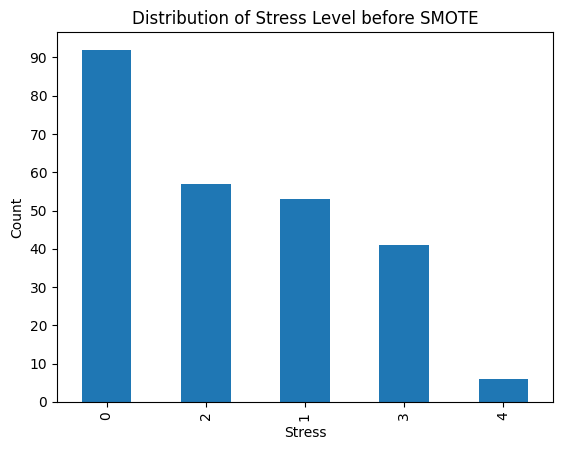

In [ ]:
df['Stress'].value_counts().plot(kind='bar')
plt.title('Distribution of Stress Level before SMOTE')
plt.xlabel('Stress')
plt.ylabel('Count')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show

###SMOTE (before SMOTE split dulu)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np # import numpy

# Assuming 'Stress' is your target variable
X = df.drop('Stress', axis=1)
y = df['Stress']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the number of samples in the smallest minority class
unique, counts = np.unique(y_train, return_counts=True) # get counts of each unique value in y_train
min_samples = np.min(counts) # find the minimum count

# Apply SMOTE to the training data
# set k_neighbors to min_samples - 1 to ensure it's less than the smallest minority class size
smote = SMOTE(random_state=42, k_neighbors=min(min_samples - 1,5) )
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.count()

360

In [ ]:
# prompt: count the data each class

# Assuming y_train_smote is your target variable after SMOTE
class_counts = y_train_smote.value_counts()
print(class_counts)

Stress
0    72
1    72
3    72
2    72
4    72
Name: count, dtype: int64


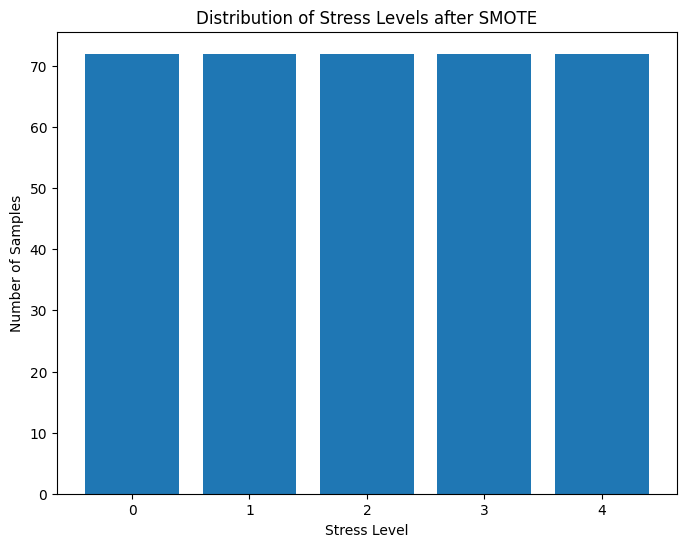

In [ ]:
# prompt: create the bar chat of it

# Assuming y_train_smote is your target variable after SMOTE
class_counts = y_train_smote.value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Stress Level')
plt.ylabel('Number of Samples')
plt.title('Distribution of Stress Levels after SMOTE')
plt.show()

###Standarized Data

In [ ]:
from sklearn.preprocessing import StandardScaler

#standardize the data
scaler = StandardScaler()

#fit and transform the scaled training data
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

#transform the scaled test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert the scaled data back to a DataFrame for easier viewing
X_train_smote_scaled_df = pd.DataFrame(X_train_smote_scaled, columns=X_train_smote.columns)

# Display the first few rows of the standardized training data
print("Standardized Training Data:")
print(X_train_smote_scaled_df.head())

# You can also calculate the mean and standard deviation of the standardized data
# to verify that it has been scaled correctly (mean should be close to 0 and standard deviation close to 1)
print("\nMean of Standardized Training Data:")
print(X_train_smote_scaled_df.mean())
print("\nStandard Deviation of Standardized Training Data:")
print(X_train_smote_scaled_df.std())

# Similarly, you can convert and display the scaled test data
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("\nStandardized Test Data:")
print(X_test_scaled_df.head())

Standardized Training Data:
       Umur  Program Studi  Fakultas  Metode Penelitian  Role of Supervisor  \
0 -0.579570      -0.436271 -0.640405           1.239036           -0.481759   
1 -0.579570      -0.694165 -0.640405          -0.807079           -0.481759   
2 -0.579570      -0.952059 -1.124746          -0.807079            1.124104   
3  0.775269      -1.467847 -1.124746           1.239036            1.124104   
4 -0.579570      -0.436271 -0.640405          -0.807079            1.124104   

   Literature Review  Analysis Method  Support System  Self Management  \
0           0.380946         0.175142       -0.311473        -0.667061   
1           0.380946         0.175142       -0.311473        -0.667061   
2           0.380946         1.576281        1.362113         0.564437   
3           0.380946         0.175142       -0.311473         1.795935   
4          -1.271351         0.175142       -3.658645         0.564437   

   Environment  
0     2.385425  
1     2.385425  
2

###SVM Modelling

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# Define the parameter ranges
C_values = [10, 100, 1000]
poly_degrees = [1, 2, 3]  # Polynomial degrees for the poly kernel
gamma_values = [1, 2, 3]  # Gamma values for the RBF and Sigmoid kernels

# Initialize cross-validation
cv = StratifiedKFold(n_splits=5)

# Store the results
results = []

# Polynomial Kernel
print("Evaluating Polynomial Kernel for Stress")
for C in C_values:
    for degree in poly_degrees:
        poly_svm = SVC(kernel='poly', C=C, degree=degree, random_state=42)
        fold_accuracies = cross_val_score(poly_svm, X_train_smote_scaled, y_train_smote, cv=cv, scoring='accuracy')
        mean_cv_accuracy = np.mean(fold_accuracies)
        print(f"Polynomial Kernel (degree={degree}, C={C}):")
        for i, fold_accuracy in enumerate(fold_accuracies):
            print(f"  Fold {i + 1} Accuracy: {fold_accuracy:.4f}")
        print(f"Mean Cross-Validation Accuracy (5-fold): {mean_cv_accuracy:.4f}\n")
        results.append({
            'kernel': 'poly', 'C': C, 'degree': degree,
            'fold_accuracies': fold_accuracies, 'cv_accuracy': mean_cv_accuracy
        })

# RBF Kernel
print("Evaluating RBF Kernel for Stress")
for C in C_values:
    for gamma in gamma_values:
        rbf_svm = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        fold_accuracies = cross_val_score(rbf_svm, X_train_smote_scaled, y_train_smote, cv=cv, scoring='accuracy')
        mean_cv_accuracy = np.mean(fold_accuracies)
        print(f"RBF Kernel (gamma={gamma}, C={C}):")
        for i, fold_accuracy in enumerate(fold_accuracies):
            print(f"  Fold {i + 1} Accuracy: {fold_accuracy:.4f}")
        print(f"Mean Cross-Validation Accuracy (5-fold): {mean_cv_accuracy:.4f}\n")
        results.append({
            'kernel': 'rbf', 'C': C, 'gamma': gamma,
            'fold_accuracies': fold_accuracies, 'cv_accuracy': mean_cv_accuracy
        })

# Linear Kernel
print("Evaluating Linear Kernel for Stress")
for C in C_values:
    linear_svm = SVC(kernel='linear', C=C, random_state=42)
    fold_accuracies = cross_val_score(linear_svm, X_train_smote_scaled, y_train_smote, cv=cv, scoring='accuracy')
    mean_cv_accuracy = np.mean(fold_accuracies)
    print(f"Linear Kernel (C={C}):")
    for i, fold_accuracy in enumerate(fold_accuracies):
        print(f"  Fold {i + 1} Accuracy: {fold_accuracy:.4f}")
    print(f"Mean Cross-Validation Accuracy (5-fold): {mean_cv_accuracy:.4f}\n")
    results.append({
        'kernel': 'linear', 'C': C,
        'fold_accuracies': fold_accuracies, 'cv_accuracy': mean_cv_accuracy
    })

# Sigmoid Kernel
print("Evaluating Sigmoid Kernel for Stress")
for C in C_values:
    for gamma in gamma_values:
        sigmoid_svm = SVC(kernel='sigmoid', C=C, gamma=gamma, random_state=42)
        fold_accuracies = cross_val_score(sigmoid_svm, X_train_smote_scaled, y_train_smote, cv=cv, scoring='accuracy')
        mean_cv_accuracy = np.mean(fold_accuracies)
        print(f"Sigmoid Kernel (gamma={gamma}, C={C}):")
        for i, fold_accuracy in enumerate(fold_accuracies):
            print(f"  Fold {i + 1} Accuracy: {fold_accuracy:.4f}")
        print(f"Mean Cross-Validation Accuracy (5-fold): {mean_cv_accuracy:.4f}\n")
        results.append({
            'kernel': 'sigmoid', 'C': C, 'gamma': gamma,
            'fold_accuracies': fold_accuracies, 'cv_accuracy': mean_cv_accuracy
        })

# Print summary of results
results_df = pd.DataFrame(results)
print(results_df)

Evaluating Polynomial Kernel for Stress
Polynomial Kernel (degree=1, C=10):
  Fold 1 Accuracy: 0.5000
  Fold 2 Accuracy: 0.4444
  Fold 3 Accuracy: 0.4444
  Fold 4 Accuracy: 0.6806
  Fold 5 Accuracy: 0.5694
Mean Cross-Validation Accuracy (5-fold): 0.5278

Polynomial Kernel (degree=2, C=10):
  Fold 1 Accuracy: 0.4722
  Fold 2 Accuracy: 0.5139
  Fold 3 Accuracy: 0.5556
  Fold 4 Accuracy: 0.7222
  Fold 5 Accuracy: 0.6111
Mean Cross-Validation Accuracy (5-fold): 0.5750

Polynomial Kernel (degree=3, C=10):
  Fold 1 Accuracy: 0.6250
  Fold 2 Accuracy: 0.6250
  Fold 3 Accuracy: 0.5833
  Fold 4 Accuracy: 0.7917
  Fold 5 Accuracy: 0.7361
Mean Cross-Validation Accuracy (5-fold): 0.6722

Polynomial Kernel (degree=1, C=100):
  Fold 1 Accuracy: 0.4444
  Fold 2 Accuracy: 0.4722
  Fold 3 Accuracy: 0.4722
  Fold 4 Accuracy: 0.6250
  Fold 5 Accuracy: 0.5833
Mean Cross-Validation Accuracy (5-fold): 0.5194

Polynomial Kernel (degree=2, C=100):
  Fold 1 Accuracy: 0.5278
  Fold 2 Accuracy: 0.5556
  Fold 3 A

### Finding Feature Importance

Literature Review    0.040 +/- 0.020
Analysis Method      0.004 +/- 0.027
Support System       0.002 +/- 0.019
Umur                 -0.006 +/- 0.036
Metode Penelitian    -0.014 +/- 0.027
Self Management      -0.026 +/- 0.028
Role of Supervisor   -0.032 +/- 0.043
Program Studi        -0.044 +/- 0.031
Fakultas             -0.048 +/- 0.027
Environment          -0.096 +/- 0.033


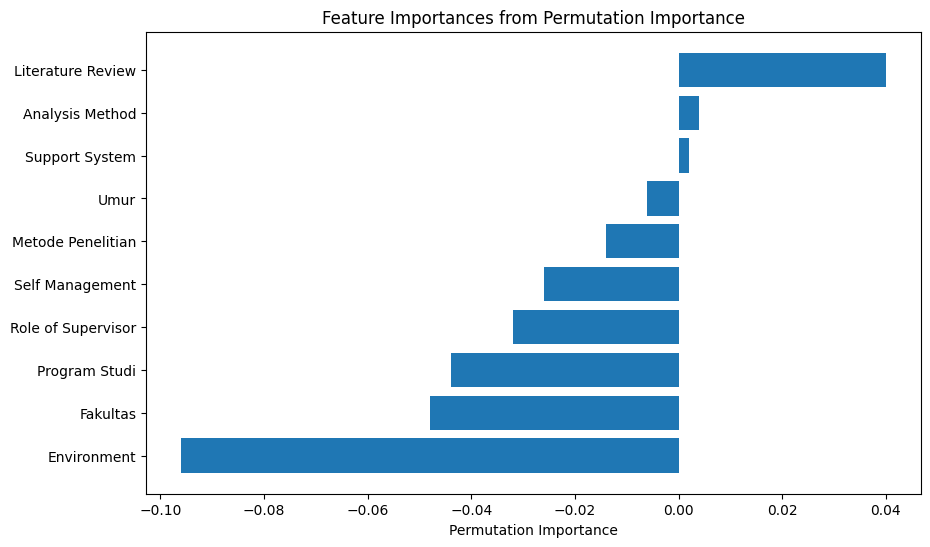

In [ ]:
best_model_index = results_df['cv_accuracy'].idxmax()
best_model_params = results_df.loc[best_model_index]

# Now train the best model on the full training data:
if best_model_params['kernel'] == 'poly':
    best_model = SVC(kernel='poly', C=best_model_params['C'], degree=best_model_params['degree'], random_state=42)
elif best_model_params['kernel'] == 'rbf':
    best_model = SVC(kernel='rbf', C=best_model_params['C'], gamma=best_model_params['gamma'], random_state=42)

best_model.fit(X_train_smote_scaled, y_train_smote)

# Now, let's try to get feature importance.  SVM doesn't directly provide feature importances like tree-based models.
# We can use the coefficients for linear SVM, or permutation importance for non-linear models.

# Since you're using a non-linear kernel, we'll use permutation importance:

from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Print the feature importances
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]:<20} "
          f"{result.importances_mean[i]:.3f}"
          f" +/- {result.importances_std[i]:.3f}")

# You can visualize this as well:
importances = pd.DataFrame({'Feature': X_test.columns, 'Importance': result.importances_mean})
importances = importances.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel("Permutation Importance")
plt.title("Feature Importances from Permutation Importance")
plt.show()